In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration
### Twitter data

In [2]:
db = sqlite3.connect('../vart.db')
c = db.cursor()

In [35]:
query = "SELECT * FROM vart_1h"
data = pd.read_sql_query(query,db)
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by=['date','tag'], inplace=True)
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors='coerce')
data.head()

,tag,date,f1,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9
663,btc,2018-03-23 14:00:00,3602,372,2161,706,952,809,653,1638,1081,566,89,2071,1069
664,eth,2018-03-23 14:00:00,1742,89,1228,246,643,541,335,828,680,427,49,1226,425
665,ltc,2018-03-23 14:00:00,379,16,244,45,134,56,36,149,95,31,7,212,119
666,btc,2018-03-23 15:00:00,3603,392,2173,667,997,864,636,1637,1061,530,84,2202,1038
667,eth,2018-03-23 15:00:00,1732,80,1263,211,626,592,353,763,615,455,64,1273,389


In [52]:
data.dtypes

tag             object
date    datetime64[ns]
f1               int64
f10              int64
f11              int64
f12              int64
f13              int64
f2               int64
f3               int64
f4               int64
f5               int64
f6               int64
f7               int64
f8               int64
f9               int64
dtype: object

In [36]:
twitter_btc = data[data['tag']=='btc']
twitter_btc.set_index('date', inplace=True) 
twitter_eth = data[data['tag']=='eth']
twitter_eth.set_index('date', inplace=True)
twitter_ltc = data[data['tag']=='ltc']
twitter_ltc.set_index('date', inplace=True)
twitter_btc.head()

,tag,f1,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9
date,,,,,,,,,,,,,,
2018-03-23 14:00:00,btc,3602,372,2161,706,952,809,653,1638,1081,566,89,2071,1069
2018-03-23 15:00:00,btc,3603,392,2173,667,997,864,636,1637,1061,530,84,2202,1038
2018-03-23 16:00:00,btc,3345,335,2026,615,920,790,537,1432,989,517,78,2065,984
2018-03-23 17:00:00,btc,3323,403,2035,585,913,807,542,1492,968,544,104,2083,885
2018-03-23 18:00:00,btc,3282,365,2023,548,913,664,565,1439,886,443,67,2016,894


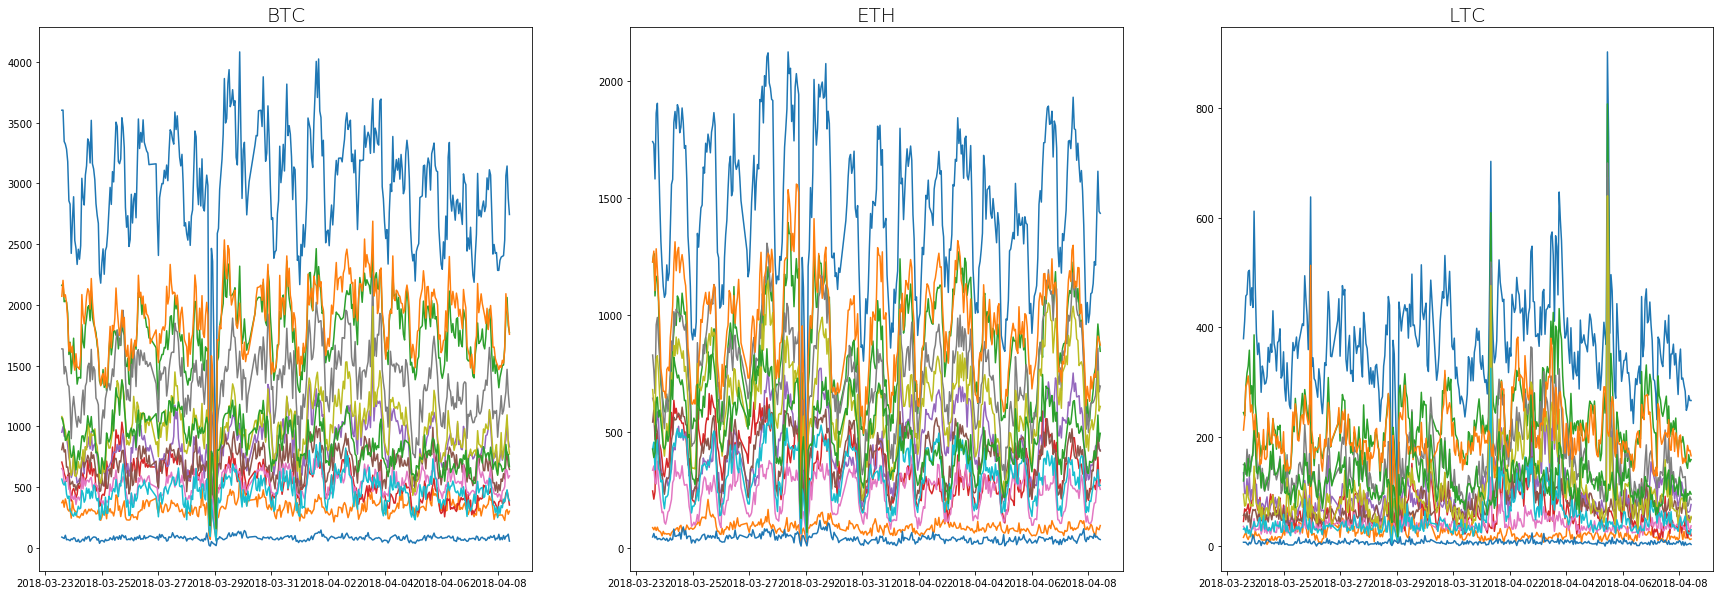

In [37]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}

ax1 = fig.add_subplot(131)
for col in data.columns[2:]:
    ax1.plot(col, data=twitter_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
for col in data.columns[2:]:
    ax2.plot(col, data=twitter_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
for col in data.columns[2:]:
    ax3.plot(col,data=twitter_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

Obvioulsy features are very correlated between each other, because they are all counts of elements from the same group. For this reason it looks reasonable to divide them by the total volume of tweets of the same time slot (i.e `f1`).

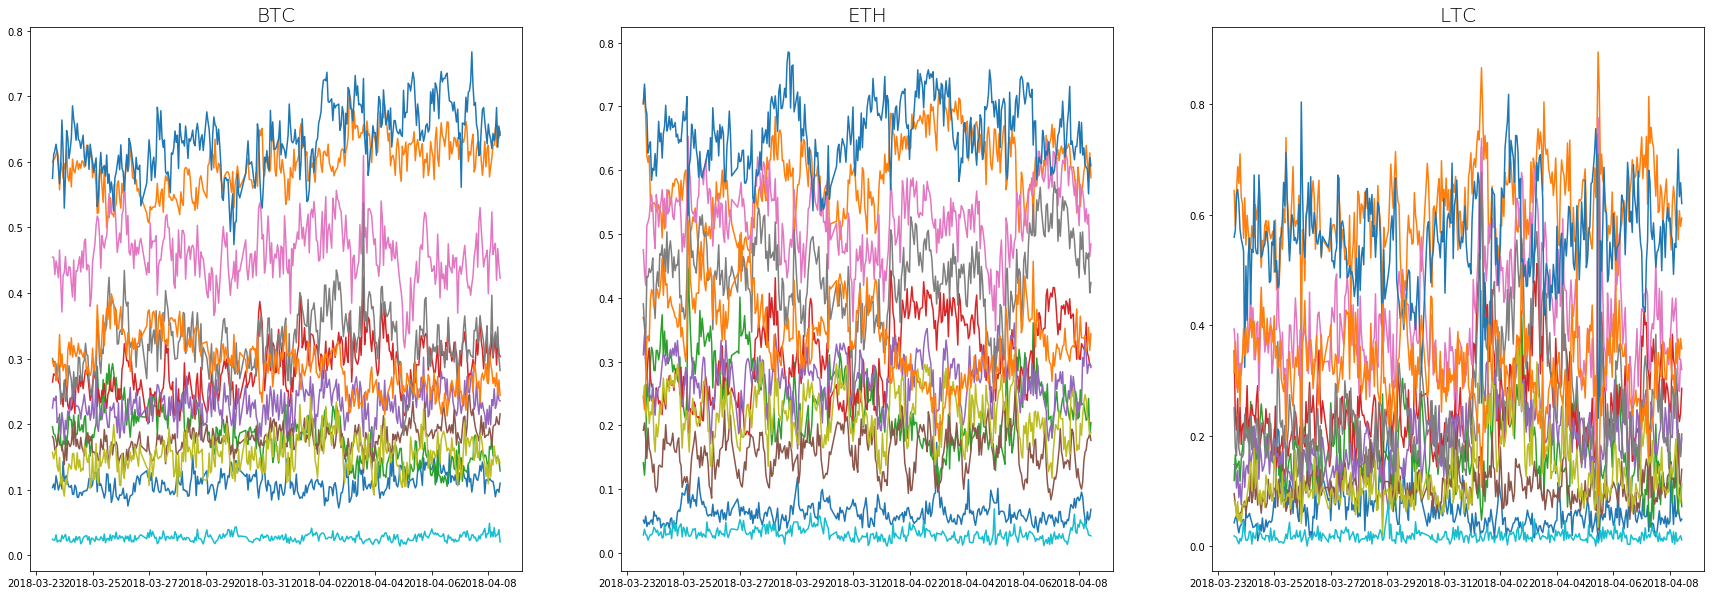

In [38]:
tmp_data = twitter_btc.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_btc['f1'], axis=0)
tmp_data['f1'] = twitter_btc['f1']
tdiv_btc = tmp_data

tmp_data = twitter_eth.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_eth['f1'], axis=0)
tmp_data['f1'] = twitter_eth['f1']
tdiv_eth = tmp_data

tmp_data = twitter_ltc.iloc[:,2:]
tmp_data = tmp_data.divide(twitter_ltc['f1'], axis=0)
tmp_data['f1'] = twitter_ltc['f1']
tdiv_ltc = tmp_data


fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}

ax1 = fig.add_subplot(131)
for col in tmp_data.columns[:-1]:
    ax1.plot(col, data=tdiv_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
for col in tmp_data.columns[:-1]:
    ax2.plot(col, data=tdiv_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
for col in tmp_data.columns[:-1]:
    ax3.plot(col, data=tdiv_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

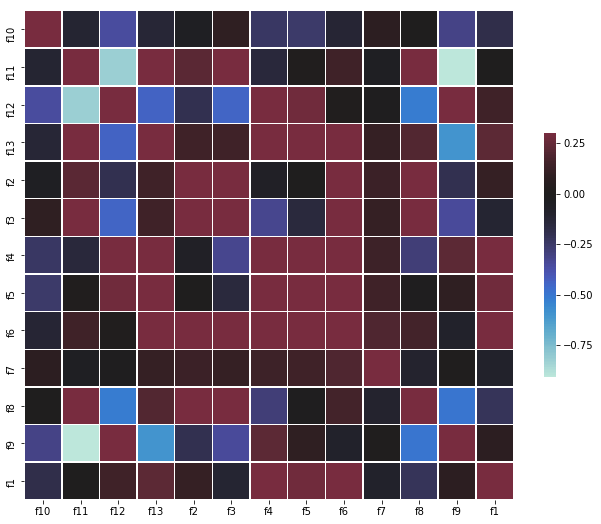

In [39]:
# Compute the correlation matrix
tmp_data = tdiv_btc.reset_index()
corr = tmp_data.loc[1:,].corr()

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Once we apply the division of the features by the total number of tweets the result appear less correlated, which is good.

### Crypto currencies prices

In [40]:
db_cryptos = sqlite3.connect('../cryptos.db')

query = "SELECT * FROM cryptos"
data_cryptos = pd.read_sql_query(query,db_cryptos)
data_cryptos['date'] = pd.to_datetime(data_cryptos['date'])
data_cryptos.set_index('date', inplace=True)
data_cryptos.sort_index(inplace=True)
data_cryptos.head()

,symbol,price,volume,market_cap
date,,,,
2018-03-21 22:40:00,LTC,166.850046,605492.007605,1.010264e+08
2018-03-21 22:40:00,BTC,8894.998570,101859.020921,9.060358e+08
2018-03-21 22:40:00,ETH,559.530318,480512.619368,2.688614e+08
2018-03-21 22:45:00,ETH,560.665817,480794.207013,2.695649e+08
2018-03-21 22:45:00,LTC,167.645108,606796.577486,1.017265e+08


In [41]:
crypto_btc = data_cryptos[data_cryptos['symbol'] == 'BTC']
crypto_btc = crypto_btc.resample('1H').median()
crypto_eth = data_cryptos[data_cryptos['symbol'] == 'ETH']
crypto_eth = crypto_eth.resample('1H').median()
crypto_ltc = data_cryptos[data_cryptos['symbol'] == 'LTC']
crypto_ltc = crypto_ltc.resample('1H').median()

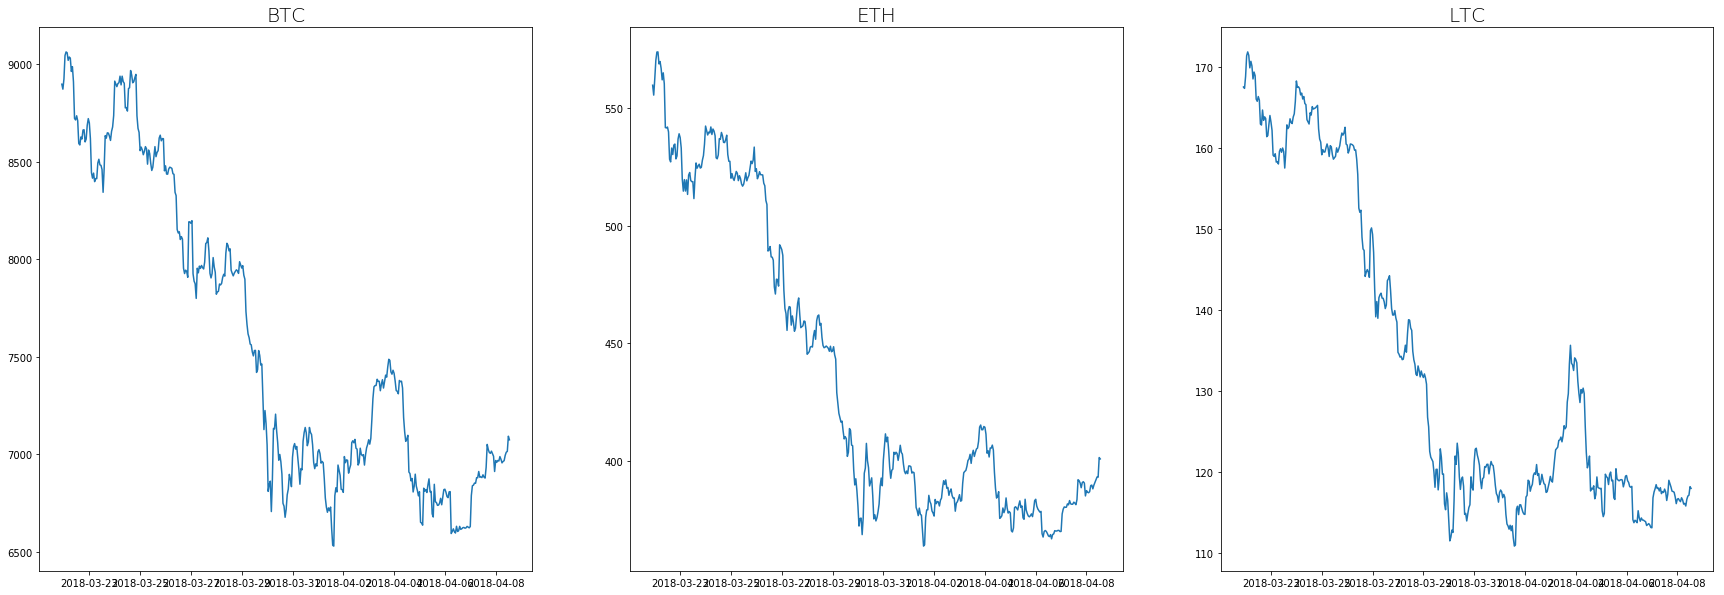

In [42]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}


ax1 = fig.add_subplot(131)
ax1.plot('price', data=crypto_btc)
ax1.set_title(
    'BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
ax2.plot('price', data=crypto_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
ax3.plot('price', data=crypto_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

In [43]:
crypto_btc['diff'] = crypto_btc['price'].diff().dropna()
crypto_eth['diff'] = crypto_eth['price'].diff().dropna()
crypto_ltc['diff'] = crypto_ltc['price'].diff().dropna()

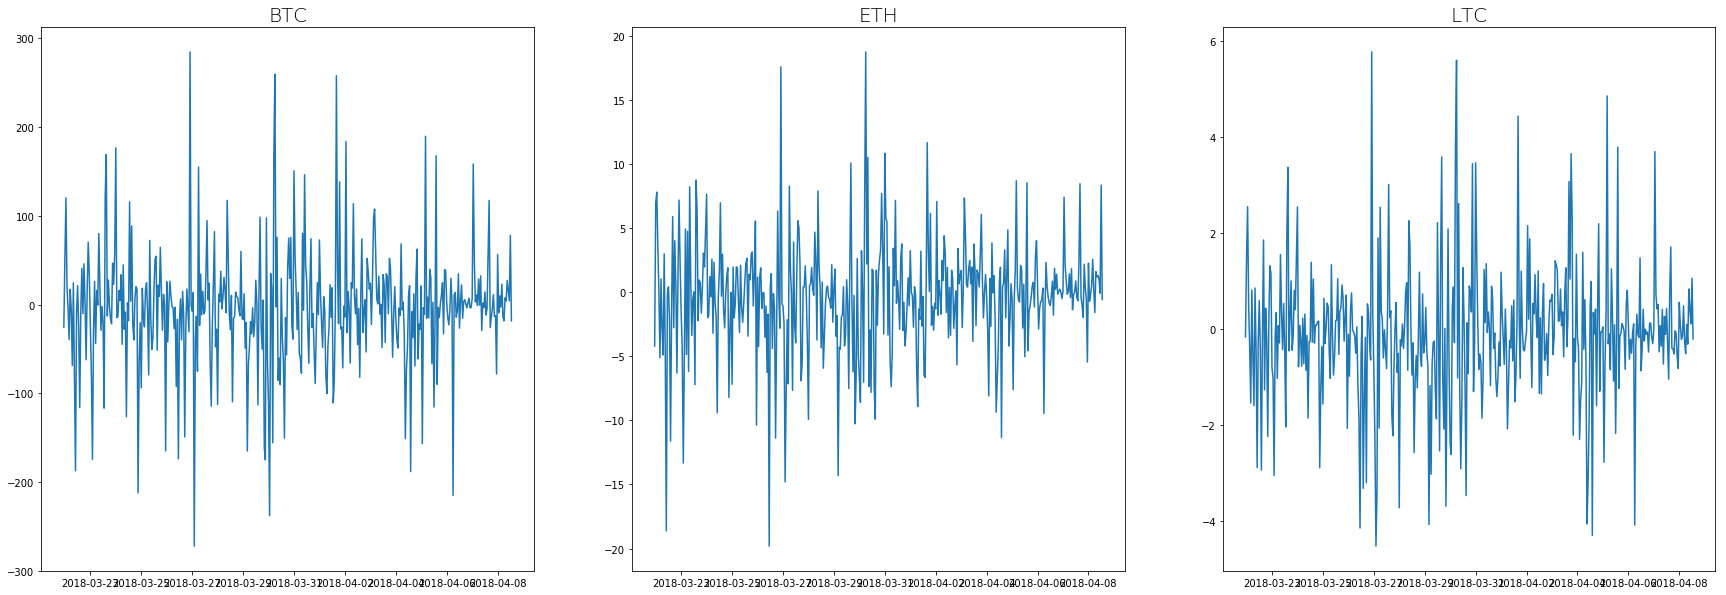

In [44]:
fig = plt.figure(figsize=(30,10))

title_font = {
    'fontsize': 20,
    'fontweight' : 10,
    'verticalalignment': 'baseline'
}


ax1 = fig.add_subplot(131)
ax1.plot('diff', data=crypto_btc)
ax1.set_title('BTC', fontdict=title_font)

ax2 = fig.add_subplot(132)
ax2.plot('diff', data=crypto_eth)
ax2.set_title('ETH',fontdict=title_font)

ax3 = fig.add_subplot(133)
ax3.plot('diff', data=crypto_ltc)
ax3.set_title('LTC',fontdict=title_font)

plt.show()

## Linear Regression

In [55]:
idx = pd.date_range(min(tdiv_btc.index), max(tdiv_btc.index), freq='h')
filled_btc = tdiv_btc.reindex(idx, method='nearest')

filled_btc.head()

,f10,f11,f12,f13,f2,f3,f4,f5,f6,f7,f8,f9,f1
2018-03-23 14:00:00,0.103276,0.599944,0.196002,0.264298,0.224597,0.181288,0.454747,0.300111,0.157135,0.024708,0.574958,0.296780,3602
2018-03-23 15:00:00,0.108798,0.603109,0.185124,0.276714,0.239800,0.176520,0.454344,0.294477,0.147100,0.023314,0.611157,0.288093,3603
2018-03-23 16:00:00,0.100149,0.605680,0.183857,0.275037,0.236173,0.160538,0.428102,0.295665,0.154559,0.023318,0.617339,0.294170,3345
2018-03-23 17:00:00,0.121276,0.612398,0.176046,0.274752,0.242853,0.163106,0.448992,0.291303,0.163707,0.031297,0.626843,0.266326,3323
2018-03-23 18:00:00,0.111213,0.616392,0.166971,0.278184,0.202316,0.172151,0.438452,0.269957,0.134979,0.020414,0.614260,0.272395,3282


In [57]:
filled_btc.dtypes

f10    float64
f11    float64
f12    float64
f13    float64
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f1       int64
dtype: object

In [151]:
frame_length = 30
shifted_list = [filled_btc.shift(i).add_suffix('_{}'.format(i)) for i in range(frame_length)]

In [152]:
delayed_btc = pd.concat(shifted_list, axis=1)

In [153]:
full_df = pd.concat([delayed_btc,crypto_btc],axis=1).dropna()

In [154]:
full_df.columns[:-4]

Index(['f10_0', 'f11_0', 'f12_0', 'f13_0', 'f2_0', 'f3_0', 'f4_0', 'f5_0',
       'f6_0', 'f7_0',
       ...
       'f13_29', 'f2_29', 'f3_29', 'f4_29', 'f5_29', 'f6_29', 'f7_29', 'f8_29',
       'f9_29', 'f1_29'],
      dtype='object', length=390)

In [155]:
X = full_df[full_df.columns[:-4]].values
y = full_df['diff'].values

In [156]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
(F, p_val) = f_regression(X,y)

In [159]:
p_val

array([  1.97121624e-01,   2.06892854e-01,   4.62613807e-01,
         1.26018019e-01,   7.20283372e-01,   1.66214104e-01,
         4.82837633e-01,   3.30652739e-01,   8.70151594e-01,
         8.70878981e-01,   1.00483286e-01,   4.85300658e-01,
         4.53328701e-01,   5.91604620e-01,   4.17996349e-01,
         2.24073755e-01,   4.94275828e-01,   4.13803470e-01,
         3.13657966e-01,   8.71417329e-01,   8.78636205e-01,
         9.06774938e-01,   7.55569228e-01,   5.42738364e-01,
         3.13341734e-01,   4.75825519e-01,   4.97068075e-01,
         6.42040879e-01,   5.72639981e-01,   2.39525582e-01,
         5.32499864e-02,   7.79647994e-01,   2.77241566e-01,
         6.22034676e-01,   1.36746288e-01,   2.07918965e-01,
         8.07021592e-01,   4.64933790e-01,   7.53318905e-01,
         5.01551310e-01,   4.83666242e-01,   5.54210761e-01,
         2.78707335e-01,   3.46032049e-01,   5.56485601e-01,
         5.14961224e-01,   8.50155411e-01,   8.19273521e-01,
         1.34020246e-01,

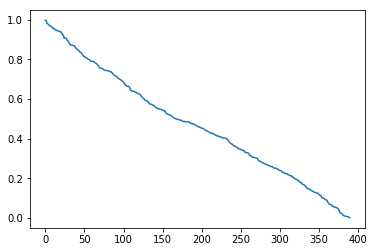

In [160]:
plt.plot(sorted(p_val,reverse=True))
plt.show()

In [161]:
import fnmatch

In [162]:
byfeat_pval = np.zeros(len(filled_btc.columns))
for i,feat in enumerate(filled_btc.columns):
    byfeat_pval[i] = p_val[[fnmatch.fnmatch(col, "{}_*".format(feat)) for col in delayed_btc.columns]].mean()

byfeat_pval

array([ 0.50787762,  0.52048139,  0.47187927,  0.40876626,  0.35145055,
        0.45908039,  0.49029675,  0.54680859,  0.45874523,  0.41437544,
        0.45875706,  0.46290625,  0.58251005])

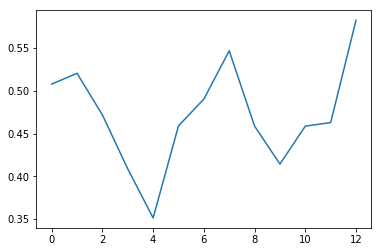

In [163]:
plt.plot(byfeat_pval)
plt.show()

In [164]:
bydel_pval = np.zeros(frame_length)
for i in range(frame_length):
    bydel_pval[i] = p_val[[fnmatch.fnmatch(col, "*_{}".format(i).format(feat)) for col in delayed_btc.columns]].mean()

bydel_pval

array([ 0.42098287,  0.55382425,  0.46564525,  0.51578312,  0.62186159,
        0.62275416,  0.57416528,  0.55147469,  0.48285698,  0.38294798,
        0.38068524,  0.2985186 ,  0.30493582,  0.37087446,  0.31049751,
        0.45557009,  0.45895954,  0.4242635 ,  0.54001754,  0.53983806,
        0.59716668,  0.5744793 ,  0.50853823,  0.47699355,  0.43954312,
        0.41528911,  0.29508058,  0.47217615,  0.62806181,  0.47144923])

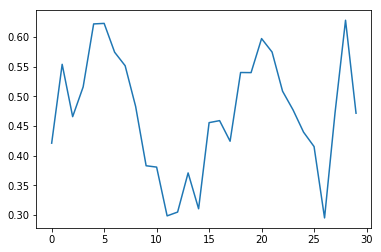

In [165]:
plt.plot(bydel_pval)
plt.show()